(intro godzilla con papa moscas y mosca con bazooka)
¿Cuál modelo es mejor?
<img src="two_models.png" alt="Drawing" style="width:60%;"/>

<img src="three_models.png" alt="Drawing" style="width:60%;"/>

¿Qué comportamiento tienen un modelo de alto bias vs un modelo de alta varianza en train? ¿Y en test?

Entre un pantalón que me queda chico y uno que me queda grande, ¿cuál elijo? 

Elegimos el que queda grande y buscamos soluciones, como un cinturón.

Vamos a buscar sobreajustar el modelo para luego usar distintas técnicas que nos permiten controlar el overfitting.

Intuición: ¿Cuándo hay más overfitting?

Pocas observaciones - Muchas observaciones

Pocos parámetros - Muchos parámetros 

Pocas epochs - Muchas epochs


## Cantidad de parámetros

In [7]:
from IPython.display import HTML
import reg_helper as RHelper
import numpy as np
import draw_nn
from matplotlib import pyplot as plt 
%matplotlib inline

Using TensorFlow backend.


Cantidad de observaciones:
Train 59
Test 59
Dos variables de entrada. Dos clases de salida (binario)


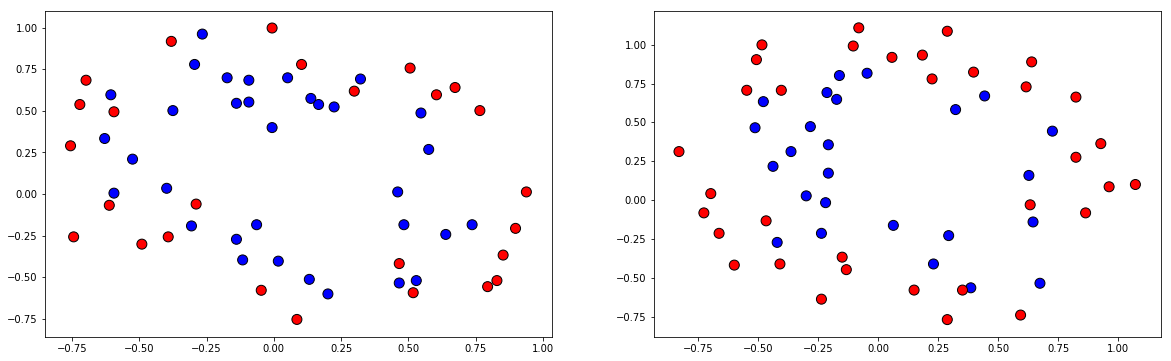

In [3]:

X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy') 
y_test = np.load('y_test.npy')
print('Cantidad de observaciones:')
print('Train',X_train.shape[0])
print('Test',X_test.shape[0])
print('Dos variables de entrada. Dos clases de salida (binario)')
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X_train, y_train, ax=ax1)
RHelper.plot_boundaries(X_test, y_test, ax=ax2)
plt.show()

**Regresión logística polinomial**

El logit es una ecuación polinómica de las dos entradas. La cantidad de parámetros a ajustar depende del grado del polinomio.

\begin{equation}
\large
a = w_0 + x_1w_1 + x_2w_2 + x_1x_2w_3 + w_4x_1^2 + w_5x_2^2 + ... + w_Nx_1^K
\end{equation}
\begin{equation}
\large
y = \sigma(a)
\end{equation}


Ajustemos una recta (polinomio de grado 1)

C:\Users\Candelaria\AppData\Local\conda\conda\envs\redesitba\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Regresion Logistica Polinomial de orden 1, con lamdba (regularización L2):0


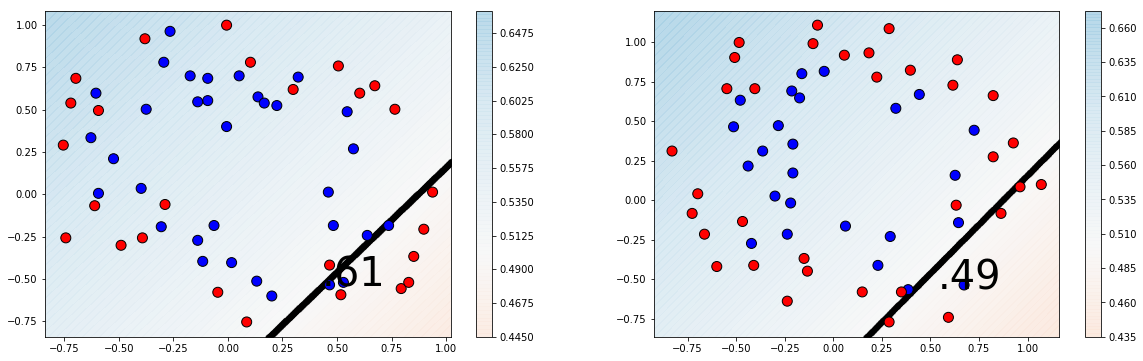

Acurracy en train 0.6101694915254238
Accuracy en test 0.4915254237288136
Cantidad de parámetros 3


In [4]:
tr_acc, ts_acc, coefs = RHelper.fit_and_get_regions(X_train, y_train, X_test, y_test, degree=1)
print('Acurracy en train', tr_acc)
print('Accuracy en test', ts_acc)
print('Cantidad de parámetros', coefs.shape[1])


C:\Users\Candelaria\AppData\Local\conda\conda\envs\redesitba\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Regresion Logistica Polinomial de orden 2, con lamdba (regularización L2):0


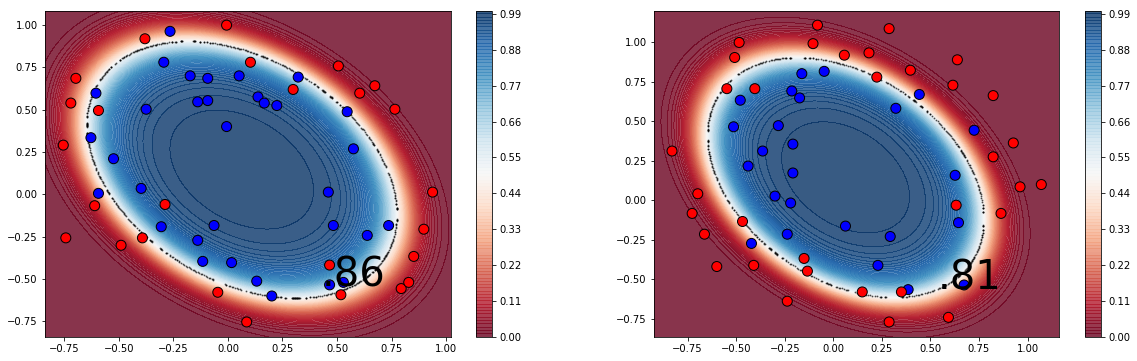

Acurracy en train 0.864406779661017
Accuracy en test 0.8135593220338984
Cantidad de parámetros 6


In [5]:
tr_acc, ts_acc, coefs = RHelper.fit_and_get_regions(X_train, y_train, X_test, y_test, degree=2)
print('Acurracy en train', tr_acc)
print('Accuracy en test', ts_acc)
print('Cantidad de parámetros', coefs.shape[1])


C:\Users\Candelaria\AppData\Local\conda\conda\envs\redesitba\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Candelaria\AppData\Local\conda\conda\envs\redesitba\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Regresion Logistica Polinomial de orden 6, con lamdba (regularización L2):0


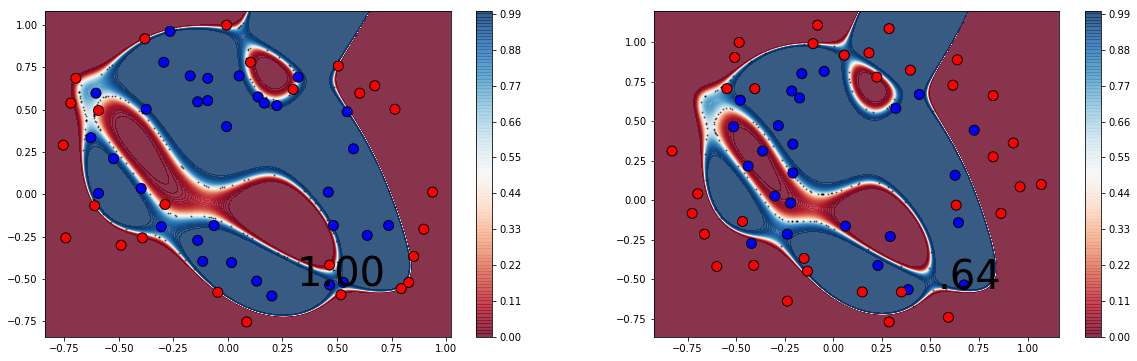

Acurracy en train 1.0
Accuracy en test 0.6440677966101694
Cantidad de parámetros 28


In [6]:
tr_acc, ts_acc, coefs = RHelper.fit_and_get_regions(X_train, y_train, X_test, y_test, degree=6)
print('Acurracy en train', tr_acc)
print('Accuracy en test', ts_acc)
print('Cantidad de parámetros', coefs.shape[1])


C:\Users\Candelaria\AppData\Local\conda\conda\envs\redesitba\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Candelaria\AppData\Local\conda\conda\envs\redesitba\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Regresion Logistica Polinomial de orden 18, con lamdba (regularización L2):0


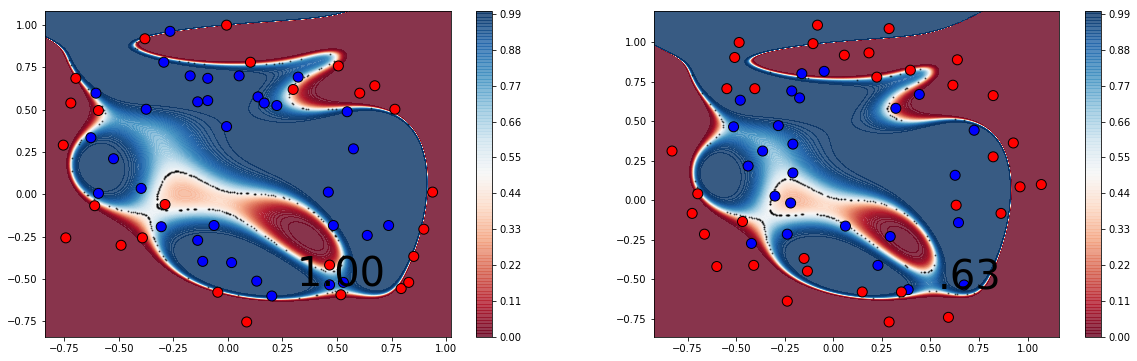

Acurracy en train 1.0
Accuracy en test 0.6271186440677966
Cantidad de parámetros 190


In [9]:
tr_acc, ts_acc, coefs = RHelper.fit_and_get_regions(X_train, y_train, X_test, y_test, degree=18)
print('Acurracy en train', tr_acc)
print('Accuracy en test', ts_acc)
print('Cantidad de parámetros', coefs.shape[1])


¿En qué modelo empezamos a sobreajustar? ¿Qué harían para elegir el mejor modelo?

In [9]:
options = [{'degree': 1, 'lambd': 0}, 
           {'degree': 2, 'lambd': 0}, 
           {'degree': 3, 'lambd': 0}, 
           {'degree': 4, 'lambd': 0}, 
           {'degree': 5, 'lambd': 0}, 
           {'degree': 6, 'lambd': 0}, 
           {'degree': 7, 'lambd': 0}, 
           {'degree': 8, 'lambd': 0}, 
           {'degree': 9, 'lambd': 0}, 
           {'degree': 10, 'lambd': 0},
           {'degree': 11, 'lambd': 0},
           {'degree': 12, 'lambd': 0},
           {'degree': 13, 'lambd': 0},
           {'degree': 14, 'lambd': 0}, 
           {'degree': 15, 'lambd': 0}, 
           {'degree': 16, 'lambd': 0}, 
           {'degree': 17, 'lambd': 0}, 
           {'degree': 18, 'lambd': 0}
           ]
degrees, lambdas, train_acc_array, test_acc_array, coefs_array_mean, coefs_array_std, coefs_abs_max, coefs_norm, coefs_num = RHelper.test_options(X_train, y_train, X_test, y_test, options, plot_it=False)

C:\Users\Candelaria\AppData\Local\conda\conda\envs\redesitba\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Candelaria\AppData\Local\conda\conda\envs\redesitba\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Candelaria\AppData\Local\conda\conda\envs\redesitba\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Candelaria\AppData\Local\conda\conda\envs\redesitba\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Candelaria\AppData\Loca

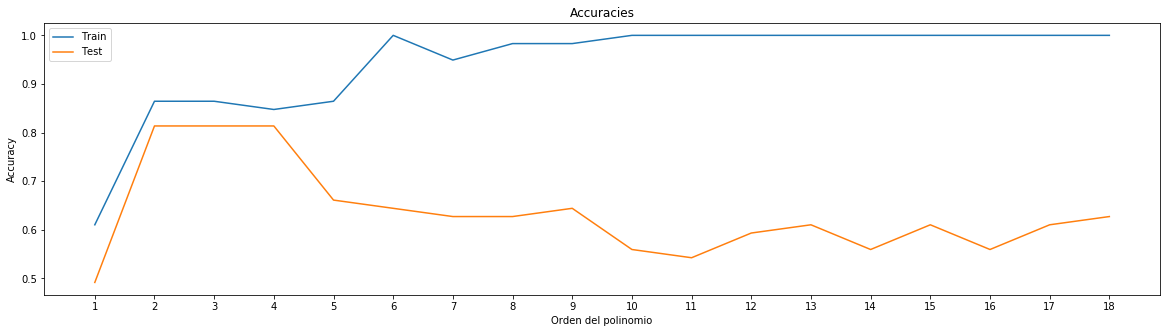

In [10]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(degrees, train_acc_array, label="Train")
ax.plot(degrees, test_acc_array, label="Test")
plt.title("Accuracies")

plt.xlabel('Orden del polinomio')
plt.ylabel('Accuracy')
ax.set_xticks(degrees)
ax.legend()
plt.show()

No handles with labels found to put in legend.


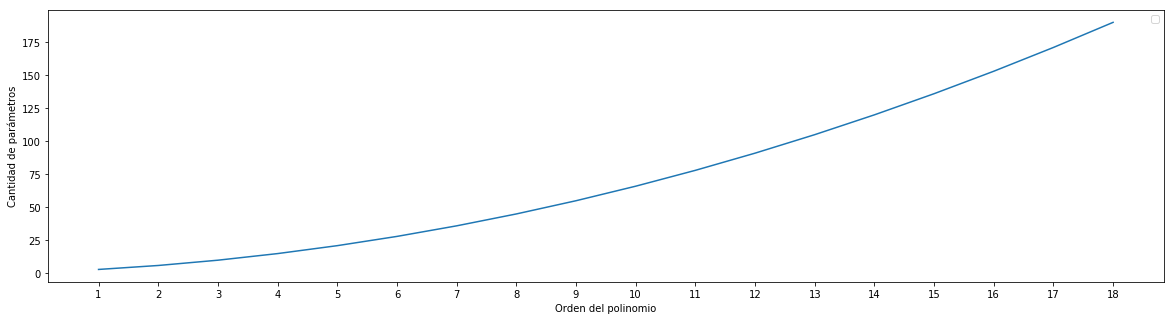

In [11]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(degrees, coefs_num)
ax.legend()
plt.xlabel('Orden del polinomio')
plt.ylabel('Cantidad de parámetros')
ax.set_xticks(degrees)
plt.show()

No handles with labels found to put in legend.


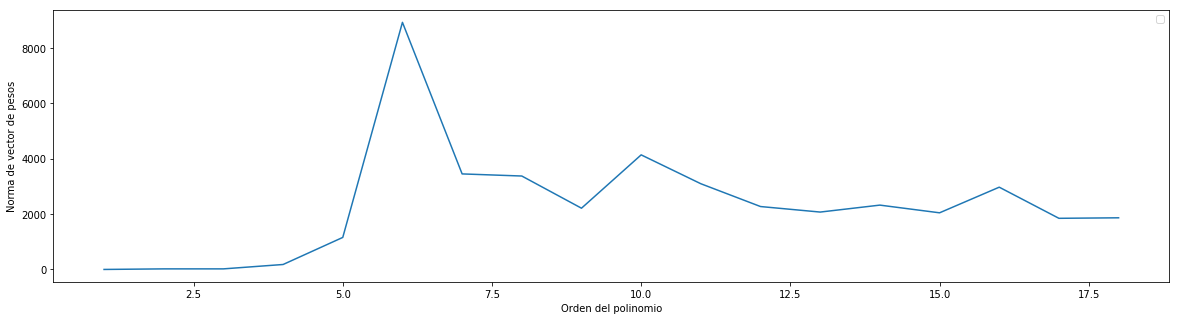

In [22]:
plt.figure(figsize=(20,5))
plt.ylabel("Norma de vector de pesos")
plt.plot(degrees, coefs_norm)
plt.xlabel('Orden del polinomio')
plt.legend()
plt.show()

## Regularización

Recordemos la función de costo de entropía cruzada para una observación:

$Loss = - \sum_i [p_i  \log(\hat{p}_i) + (1-p_i) \log(1-\hat{p}_i)]$  

donde: 
- $p_i$ solo puede valer 1 o 0. Vale 1 si pertenece a la clase $i$'esima, y 0 si no pertenece
- $\hat{p}_i$ es la estimación de la probabilidad de que $X_i$ pertenezca a la clase

La regularización busca conseguir modelos más generalizables, es decir, con menor sobreajuste. Esto se logra mediante modelos con pesos bajos, que se obtienen penalizando los pesos altos. Para ello, se agrega un término a la función de costo que es función del módulo de los pesos.

$Loss = - \sum_i [p_i  \log(\hat{p}_i) + (1-p_i) \log(1-\hat{p}_i)] + f(\mathbf {w})$  

------------------------------------------------------------------------------------------------------------

**LASSO**: normalización de norma L1

$Loss = - \sum_i [p_i  \log(\hat{p}_i) + (1-p_i) \log(1-\hat{p}_i)] + \lambda  ||\mathbf {w}||_1$ 

$||\mathbf {w}||_1 = |w_1|+|w_2|+...+|w_n|$

<img src="lasso_penalty.png" alt="Drawing" style="width:40%;"/>

La disminución en el valor de loss depende de cuánto cambie el valor de un peso, pero no depende del valor del peso. 

------------------------------------------------------------------------------------------------------

**RIDGE**: normalización de norma L2

$Loss = - \sum_i [p_i  \log(\hat{p}_i) + (1-p_i) \log(1-\hat{p}_i)] + \lambda   ||\mathbf {w}||_2$ 

$||\mathbf {w}||_2 = \sqrt{w_1^2+w_2^2+...+w_n^2}$

<img src="ridge_penalty.png" alt="Drawing" style="width:40%;"/>


La disminución en el valor de loss será distinta según el valor del peso 

In [50]:
def plotBoundary(data, labels, clf_1, N=300,degree=False,include_bias=False):
    class_1 = data[labels == 1]
    class_0 = data[labels == 0]
    mins = data[:,:2].min(axis=0)
    maxs = data[:,:2].max(axis=0)
    x1 = np.linspace(mins[0], maxs[0], N)

    x1, x2 = np.meshgrid(x1, x2)
    X=np.c_[x1.flatten(), x2.flatten()]
    if degree:
        poly=PolynomialFeatures(degree,include_bias=include_bias)
        X=poly.fit_transform(X)
    Z_nn = clf_1.predict_proba(X)[:, 0]

    # Put the result into a color plot
    Z_nn = Z_nn.reshape(x1.shape)
    
    fig = plt.figure(figsize=(20,10))
    ax = fig.gca()
    cm = plt.cm.RdBu
        
    ax.contour(x1, x2, Z_nn, (0.5,), colors='b', linewidths=1)
    ax.scatter(class_1[:,0], class_1[:,1], color='b', s=20, alpha=0.5)
    ax.scatter(class_0[:,0], class_0[:,1], color='r', s=20, alpha=0.5)
    plt.show()

**Práctica con Pesos y Alturas**

In [34]:
import pandas as pd
df = pd.read_csv('./data/alturas-pesos-mils-train.csv')
data = df[['Altura', 'Peso']].values
y=np.array([0 if x=='Hombre' else 1 for x in df['Genero']])

In [35]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,y, test_size=0.4, shuffle=True, random_state=500)


In [36]:
clf_sin_regu = LogisticRegression()
clf_sin_regu.fit(X_train,y_train)

C:\Users\Candelaria\AppData\Local\conda\conda\envs\redesitba\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

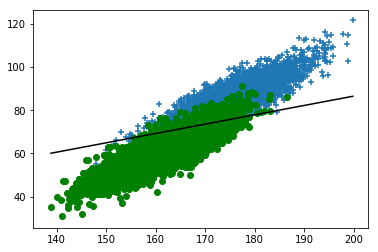

In [37]:
fig = plt.figure()

plt.scatter(data[y==0,0],data[y==0,1], marker='+')
plt.scatter(data[y==1,0],data[y==1,1], c= 'green', marker='o')
w = clf_sin_regu.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(min(data[:,0]),max(data[:,0]), 100)
yy = a * xx - (clf_sin_regu.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-')

In [38]:
def plotLinearBoundary(X,y,clf):
    fig = plt.figure()
    plt.scatter(X[y==0,0],X[y==0,1], marker='+')
    plt.scatter(X[y==1,0],X[y==1,1], c= 'green', marker='o')
    w = np.squeeze(clf.coef_)
    a = -w[0] / w[1]
    xx = np.linspace(min(X[:,0]),max(X[:,0]), 100)
    yy = a * xx - (np.squeeze(clf.intercept_)) / w[1]

    plt.plot(xx, yy, 'k-')

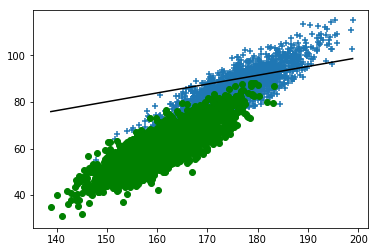

In [39]:
clf_lasso = Lasso(alpha=0.01)
clf_lasso.fit(X_train,y_train)
plotLinearBoundary(X_train,y_train,clf_lasso)

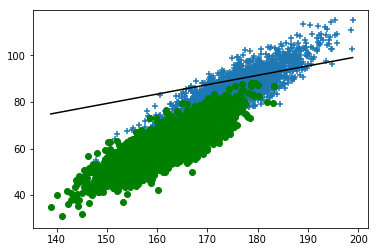

In [41]:
clf_ridge = Ridge(alpha=0.1)
clf_ridge.fit(X_train,y_train)

plotLinearBoundary(X_train, y_train, clf_ridge)


In [63]:
from sklearn.preprocessing import PolynomialFeatures
order = 2
poly = PolynomialFeatures(order,include_bias=True)
X_poly_train =poly.fit_transform(X_train,)
print(poly.powers_)

[[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]
1


In [72]:
def plotLinearBoundary(X,y,clf,powers=None):
    fig = plt.figure()
    plt.scatter(X[y==0,0],X[y==0,1], marker='+')
    plt.scatter(X[y==1,0],X[y==1,1], c= 'green', marker='o')
    if powers is not None:
        a = np.all(np.array([ powers[:,0]==1 ,powers[:,1]==0]), axis=0)
        idx_x1 = list(np.all(np.array([ powers[:,0]==1 ,powers[:,1]==0]), axis=0)).index(True)
        idx_x2 = list(np.all(np.array([ powers[:,1]==1 ,powers[:,0]==0]), axis=0)).index(True)
    else:
        idx_x1 = 0
        idx_x2 = 1

    print(idx_x1)
    print(idx_x2)
    w = np.squeeze(clf.coef_)
    print(w)
    a = -w[idx_x1] / w[idx_x2]
    xx = np.linspace(min(X[:,idx_x1]),max(X[:,idx_x1]), 100)
    yy = a * xx - (np.squeeze(clf.intercept_)) / w[idx_x2]

    plt.plot(xx, yy, 'k-')

1
2
[ 0.         -0.         -0.          0.00012292 -0.0003706   0.00018012]


C:\Users\Candelaria\AppData\Local\conda\conda\envs\redesitba\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Candelaria\AppData\Local\conda\conda\envs\redesitba\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Candelaria\AppData\Local\conda\conda\envs\redesitba\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars


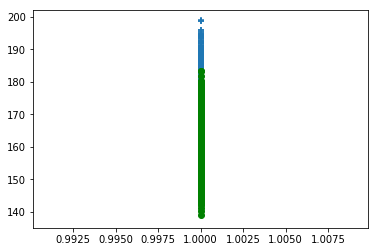

In [74]:
clf_lasso = Lasso(alpha=0.1)
clf_lasso.fit(X_poly_train,y_train)
plotLinearBoundary(X_poly_train, y_train, clf_lasso, powers=poly.powers_)

**Red neuronal multicapa**

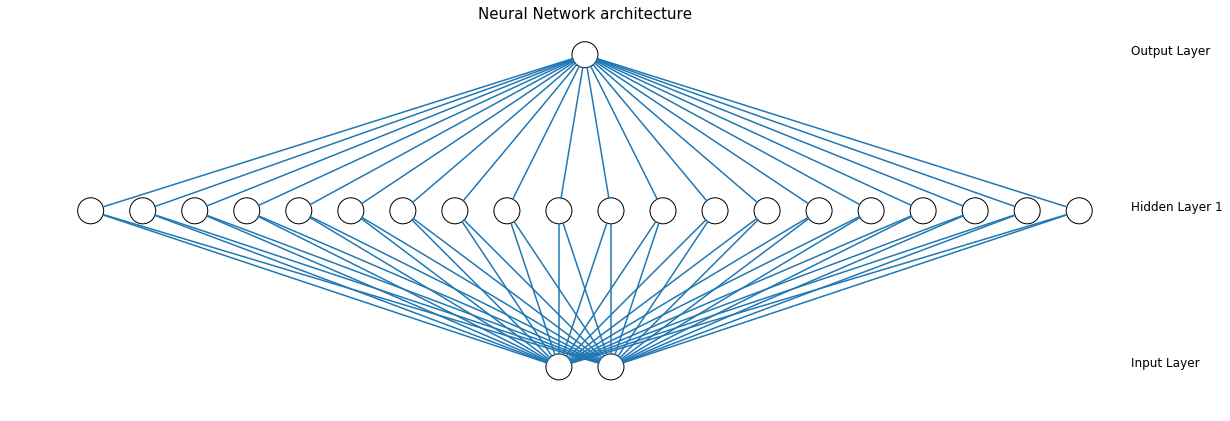

In [22]:
input_shape = 2
hidden_units = 20 
output_size = 1
network = draw_nn.DrawNN( [input_shape, hidden_units, output_size] )
network.draw()

In [23]:
from keras.models import Sequential
from keras.layers import Dense
def get_two_layer_model_compiled(input_shape, output_size, hidden_units, lr=2,decay=0.0):

    model = Sequential()
    sgd = optimizers.SGD(lr=lr, decay=decay)
    model.add(Dense(hidden_units,input_dim=input_shape,  activation='sigmoid', ))
    model.add(Dense(output_size, 
                    activation='sigmoid', 
                    kernel_initializer='zeros', 
                    name='Salida'
                   ))
    model.compile(loss = 'binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [25]:
from fnn_helper import PlotLosses
from keras import optimizers

lr=1
decay=0

plot_losses = PlotLosses(plot_interval=200, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
two_layer_model = get_two_layer_model_compiled(input_shape, 
                                                 output_size, 
                                                 hidden_units, lr, decay 
                                                )
two_layer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                60        
_________________________________________________________________
Salida (Dense)               (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


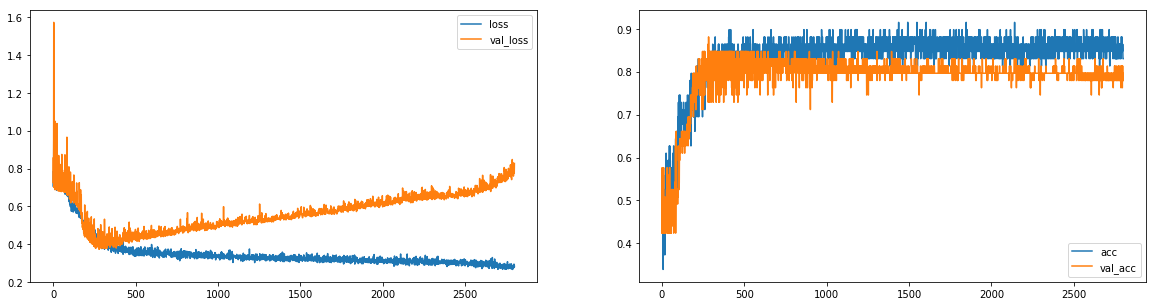

Cantidad de parámetros 81
Mejor acc en train 0.9152542423393767
Mejor acc en test 0.8813559392751273


In [26]:

epochs = 3000
batch_size = 5

hist = two_layer_model.fit(X_train, 
          y_train, batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses],
         )

print('Cantidad de parámetros',two_layer_model.count_params())
print('Mejor acc en train', max(hist.history['acc']))
print('Mejor acc en test', max(hist.history['val_acc']))

In [27]:
hidden_units = 2 
two_layer_model = get_two_layer_model_compiled(input_shape, 
                                                 output_size, 
                                                 hidden_units=hidden_units, 
                                                 lr=lr, 
                                                 decay=decay,
                                                )
two_layer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2)                 6         
_________________________________________________________________
Salida (Dense)               (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = two_layer_model.fit(X_train, 
          y_train, batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses],
         )
print('Cantidad de parámetros',two_layer_model.count_params())
print('Mejor acc en train', max(hist.history['acc']))
print('Mejor acc en test', max(hist.history['val_acc']))

In [ ]:
hidden_units = 200 
two_layer_model = get_two_layer_model_compiled(input_shape, 
                                                 output_size, 
                                                 hidden_units=hidden_units, 
                                                 lr=lr, 
                                                 decay=decay,
                                                )

In [ ]:
hist = two_layer_model.fit(X_train, 
          y_train, batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses],
         )
print('Cantidad de parámetros',two_layer_model.count_params())
print('Mejor acc en train', max(hist.history['acc']))
print('Mejor acc en test', max(hist.history['val_acc']))

## Tamaño del dataset

**Cross-Validation**

In [ ]:
from regularization_helper import plot_it
dataset_200 = np.load('200_samples_OK.npy')
X = dataset_200[:,:2]
y = dataset_200[:, 2]
plot_it(X,y)
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(10)
splited_indexs = skf.split(X, y)
print(type(splited_indexs))
print(next(splited_indexs))


In [ ]:
i=0
training_sets = []
for train_index, test_index in splited_indexs:
    i=i+1
    print("CV dataset:", i)
    print(train_index.shape, test_index.shape)
    dictionary = {'X_train':X[train_index], 'y_train':y[train_index], 'X_test':X[test_index],'y_test':y[test_index]}
    training_sets.append(dictionary)

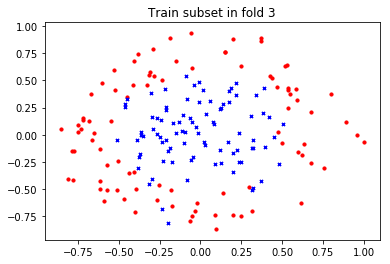

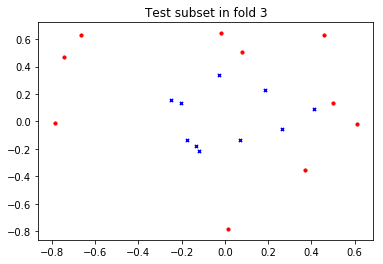

In [53]:
idx = 3
plot_it(training_sets[idx]['X_train'],training_sets[idx]['y_train'])
plt.title('Train subset in fold ' + str(idx))
plt.show()
plt.title('Test subset in fold ' + str(idx))
plot_it(training_sets[idx]['X_test'],training_sets[idx]['y_test'])
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
model = get_two_layer_model_compiled(input_shape, 
                                      output_size, 
                                      hidden_units)
classifier = KerasClassifier(model, batch_size=25,  
                             epochs=10, verbose=0)
cross_val_scores = cross_val_score(estimator=classifier, X=X, y=y, cv=skf, 
                                   scoring='accuracy')

## Regularización en redes neuronales
**Regularizers de Keras**

En una red neuronal, la regularización se define en cada capa. Puedo definir los pesos de cuáles capas se sumarán en la función de costo. Usando Keras, puedo definir el 'regularizer' de cada capa

In [76]:
from keras import regularizers
#Los que ya están implementados en Keras son: 
keras.regularizers.l1(0.)
keras.regularizers.l2(0.)
keras.regularizers.l1_l2(l1=0.01, l2=0.01)

NameError: name 'keras' is not defined

In [75]:
model = Sequential()
model.add(Dense(64, input_dim=64,
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))

NameError: name 'model' is not defined

**Dropout**

Simply put, dropout refers to ignoring units (i.e. neurons) during the training phase of certain set of neurons which is chosen at random. By “ignoring”, I mean these units are not considered during a particular forward or backward pass.

More technically, At each training stage, individual nodes are either dropped out of the net with probability 1-p or kept with probability p, so that a reduced network is left; incoming and outgoing edges to a dropped-out node are also removed.

Training Phase:
Training Phase: For each hidden layer, for each training sample, for each iteration, ignore (zero out) a random fraction, p, of nodes (and corresponding activations).

Testing Phase:
Use all activations, but reduce them by a factor p (to account for the missing activations during training).



## Dataset bio (gliomas? algun otro?)
